In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv("../data/BetterDays.csv")
data = data.drop(34994)

In [2]:
data.describe()

,approve,cityname,content,gender,id,nickname,score,time
count,105957,105924,105957,105958,105958,105958,105957,105957
unique,100,1056,98763,6,105956,92583,22,80065
top,0,广州,你保护世界，我保护你,0,1089511713,.,5,2019-10-27 16:51:25
freq,55336,3795,464,28138,2,490,52228,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105958 entries, 0 to 105958
Data columns (total 8 columns):
approve     105957 non-null object
cityname    105924 non-null object
content     105957 non-null object
gender      105958 non-null object
id          105958 non-null object
nickname    105958 non-null object
score       105957 non-null object
time        105957 non-null object
dtypes: object(8)
memory usage: 7.3+ MB


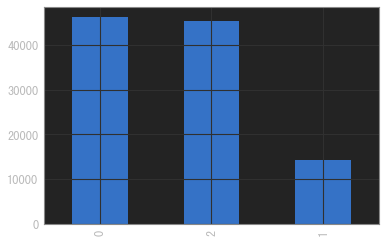

In [4]:
# 将gender转成数值型格式并绘制柱状图
data['gender'] = data['gender'].astype('int')
gender = data['gender'].value_counts()
gender.plot(kind='bar')

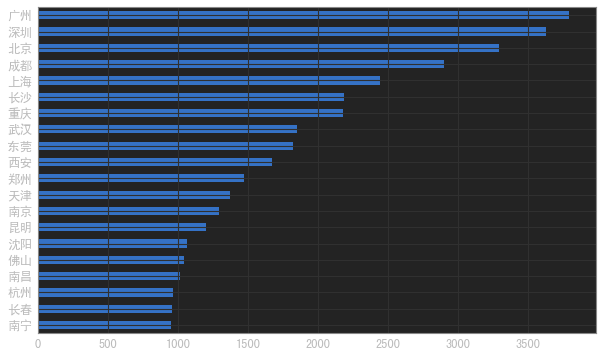

In [5]:
# 空值处理，前20城市排行
data['cityname'] = data['cityname'].fillna('zero_city')
cityname_top20 = data['cityname'].value_counts().head(20)
plt.figure(figsize=(10,6))
cityname_top20.sort_values(ascending=True).plot(kind='barh')

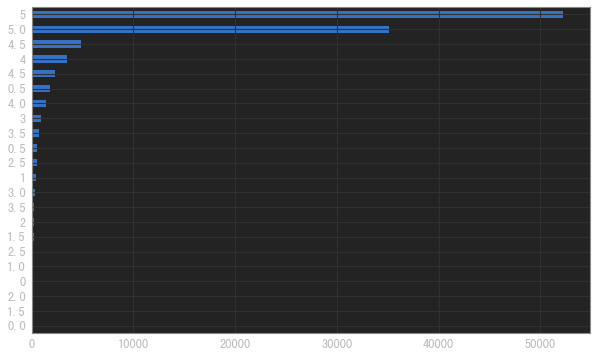

In [6]:
# 评分数量排行
data = data.dropna(subset=['score'])
score = data['score'].value_counts()
plt.figure(figsize=(10,6))
score.sort_values(ascending=True).plot(kind='barh')

In [77]:
from pyecharts.charts import Geo
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType
from collections import Counter
cityname = Counter(data['cityname']).most_common(300)

def geo_base() -> Geo:
    c = (
        Geo()
        .add_schema(maptype="china")
        .add("全国观众地域分布",cn)
#              [list(z) for z in zip(cityname.index, cityname.values)])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True,min_=0,max_=5000),
            title_opts=opts.TitleOpts(title="Geo-VisualMap（分段型）"),
        )
    )
    return c

geo_base().render()

Text(0.5, 1.0, '用户评分排行榜')

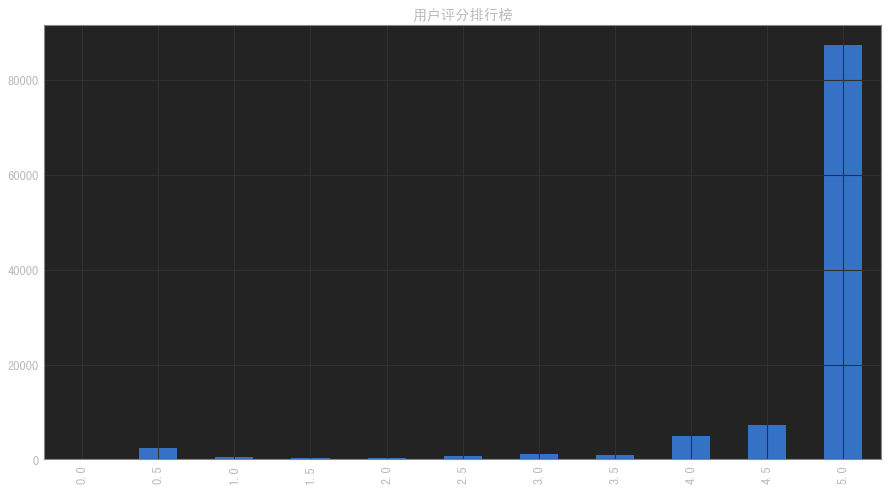

In [127]:
# 评分柱状图
plt.figure(figsize=(15,8))
data['score'] = data['score'].astype('float')
score = data['score'].value_counts().sort_index()
score.plot(kind='bar')
plt.title("用户评分排行榜")


Text(0.5, 1.0, '用户评论数量与时间关系')

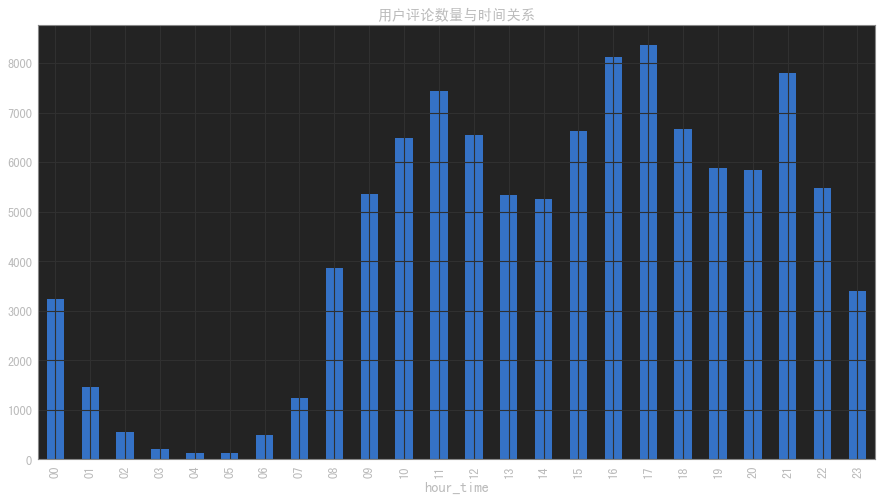

In [172]:
# 用户评论数量与时间关系
import re
data['hour_time'] = data['time'].map(lambda x: re.split(":| ",x)[1])

plt.figure(figsize=(15,8))
data.groupby('hour_time')['id'].count().plot(kind='bar')
plt.title("用户评论数量与时间关系")

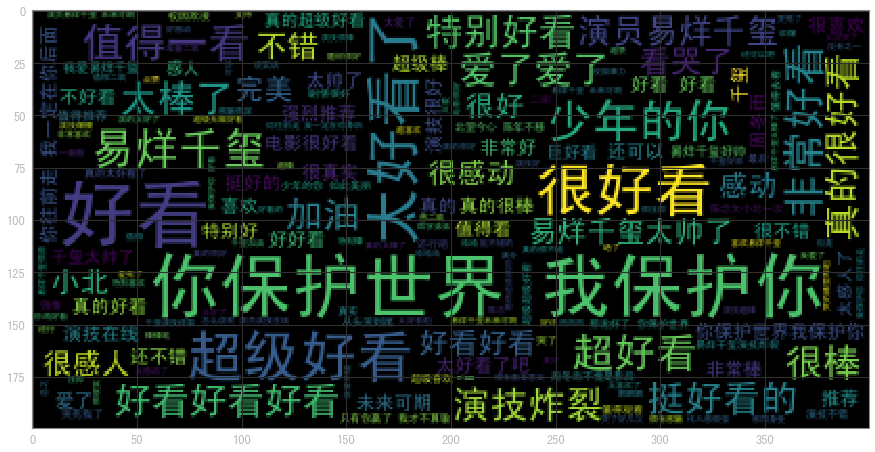

In [226]:
# 评论词云图
import wordcloud
fonts = '/Users/camelwong/anaconda3//lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf'
plt.figure(figsize=(15,8))
text = ' '.join([n for n in data['content']])
wc = wordcloud.WordCloud(font_path = fonts)
wc.generate_from_text(text)
plt.imshow(wc)